<a href="https://colab.research.google.com/github/AgustinSiben/AprMaq/blob/main/Trabajo_Practico_6_AM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Trabajo Práctico 6 - AM

In [44]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import  StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn import linear_model, metrics

##Obtengo y muestro los datos y sus caracteristicas
Tambien elimino las columnas en las que tengo datos NAN

In [45]:
true_news = pd.read_csv("https://raw.githubusercontent.com/emmanueliarussi/DataScienceCapstone/master/3_MidtermProjects/ProjectBHP/data/housing_data.csv")
true_news = true_news.dropna()
'''
CRIM - per capita crime rate by town
ZN - proportion of residential land zoned for lots over 25,000 sq.ft.
INDUS - proportion of non-retail business acres per town.
CHAS - Charles River dummy variable (1 if tract bounds river; 0 otherwise)
NOX - nitric oxides concentration (parts per 10 million)
RM - average number of rooms per dwelling
AGE - proportion of owner-occupied units built prior to 1940
DIS - weighted distances to five Boston employment centres
RAD - index of accessibility to radial highways
TAX - full-value property-tax rate per $10,000
PTRATIO - pupil-teacher ratio by town
B - 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
LSTAT - % lower status of the population
MEDV - Median value of owner-occupied homes in $1000's
'''
true_news.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,394.000000,394.000000,394.000000,394.000000,394.000000,394.000000,394.000000,394.000000,394.000000,394.000000,394.000000,394.000000,394.000000,394.000000
mean,3.690136,11.460660,11.000863,0.068528,0.553215,6.280015,68.932741,3.805268,9.403553,406.431472,18.537563,358.490939,12.769112,22.359645
std,9.202423,23.954082,6.908364,0.252971,0.113112,0.697985,27.888705,2.098571,8.633451,168.312419,2.166460,89.283295,7.308430,9.142979
min,0.006320,0.000000,0.460000,0.000000,0.389000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,2.600000,1.730000,5.000000
25%,0.081955,0.000000,5.130000,0.000000,0.453000,5.879250,45.475000,2.110100,4.000000,280.250000,17.400000,376.707500,7.125000,16.800000
50%,0.268880,0.000000,8.560000,0.000000,0.538000,6.201500,77.700000,3.199200,5.000000,330.000000,19.100000,392.190000,11.300000,21.050000
75%,3.435973,12.500000,18.100000,0.000000,0.624000,6.605500,94.250000,5.116700,24.000000,666.000000,20.200000,396.900000,17.117500,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [46]:
true_news

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
5,0.02985,0.0,2.18,0.0,0.458,6.430,58.7,6.0622,3,222,18.7,394.12,5.21,28.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
499,0.17783,0.0,9.69,0.0,0.585,5.569,73.5,2.3999,6,391,19.2,395.77,15.10,17.5
500,0.22438,0.0,9.69,0.0,0.585,6.027,79.7,2.4982,6,391,19.2,396.90,14.33,16.8
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9


## El valor medio de las viviendas es la columna MEDV que es el target al que hago la predicción
Muestro todos los parametros en función del valor de la propiedad con una regresión lineal para cada conjunto

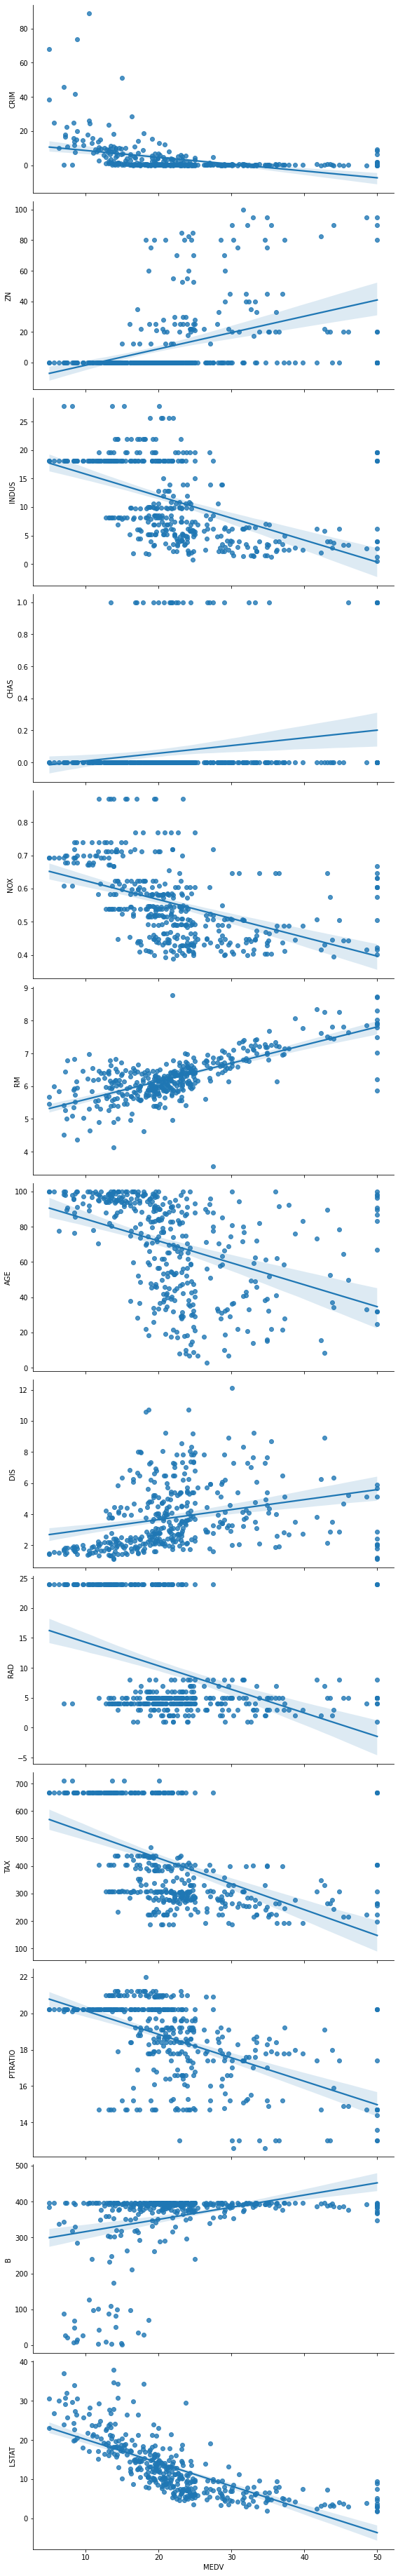

In [47]:
y = true_news['MEDV']
X = true_news.copy()
del X['MEDV']
sns.pairplot(true_news, x_vars='MEDV', y_vars=X.columns,  height=4, aspect=2., kind='reg');

##Normalizo los parámetros para un mejor analisís

In [48]:
Sc = StandardScaler()
X_norm = Sc.fit_transform(X)
X_norm = pd.DataFrame(X_norm,columns=X.columns)
X_norm

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,-0.400818,0.273342,-1.259620,-0.271237,-0.134687,0.423161,-0.134014,0.135851,-0.974609,-0.656944,-1.496303,0.430740,-1.067126
1,-0.398535,-0.479051,-0.569724,-0.271237,-0.745475,0.202245,0.357849,0.554334,-0.858633,-0.978184,-0.340879,0.430740,-0.497196
2,-0.398537,-0.479051,-0.569724,-0.271237,-0.745475,1.298216,-0.281214,0.554334,-0.858633,-0.978184,-0.340879,0.385097,-1.197278
3,-0.397984,-0.479051,-1.278462,-0.271237,-0.842847,1.029962,-0.830521,1.076829,-0.742657,-1.097162,0.075073,0.405283,-1.346610
4,-0.398258,-0.479051,-1.278462,-0.271237,-0.842847,0.215156,-0.367380,1.076829,-0.742657,-1.097162,0.075073,0.399564,-1.035615
...,...,...,...,...,...,...,...,...,...,...,...,...,...
389,-0.382157,-0.479051,-0.189991,-0.271237,0.281356,-1.019964,0.163976,-0.670530,-0.394730,-0.091800,0.306158,0.418068,0.319337
390,-0.377092,-0.479051,-0.189991,-0.271237,0.281356,-0.362955,0.386570,-0.623629,-0.394730,-0.091800,0.306158,0.430740,0.213845
391,-0.396580,-0.479051,0.134666,-0.271237,0.175132,-0.229545,0.278863,-0.724158,-0.974609,-0.793769,1.138063,0.430740,-0.505417
392,-0.394895,-0.479051,0.134666,-0.271237,0.175132,0.998402,0.792268,-0.781413,-0.974609,-0.793769,1.138063,0.430740,-0.976704


##Con los valores normalizados genero un grupo de entrenamiento para la regresión

In [49]:
X_train, X_test, y_train, y_test = train_test_split(X_norm, y, random_state=1)

##Comienzo con una regresión lineal y veo el resultado con el R^2

In [50]:
linear_regressor = LinearRegression()
fit = linear_regressor.fit(X_train, y_train)
print(f'R^2: {fit.score(X_train, y_train)}')

R^2: 0.7593511972791913


##Los parámetros del ajuste lineal

In [51]:
print(f'Intercept: {fit.intercept_}\n')
print(f'Coeficientes: {fit.coef_}')

Intercept: 22.40554560602569

Coeficientes: [-0.39899777  0.88481672  0.22385121  0.90652889 -1.6388835   2.91833388
 -0.25419655 -2.80503323  1.95737593 -1.70132324 -1.74958642  1.09818087
 -3.93645205]


##La predicción del conjunto de pruebas

In [52]:
y_pred = fit.predict(X_test)
y_pred

array([24.37220073, 26.57745623, 11.48924061, 12.1557786 , 40.49421819,
       31.53315689, 29.04907925, 22.72370488, 28.5261511 , 19.15532846,
       18.61538739, 21.43972214, 13.02481573, 45.03289209, 20.28825987,
       25.48764291, 21.01566917, 27.48581851, 10.38027706, 22.66487018,
       27.23581319, 24.38292427,  8.40814108, 24.79416253, 18.7998984 ,
        9.05597176, 19.94661267,  8.07162413, 28.31006495, 23.4547383 ,
       17.6037524 , 23.42897058, 28.70000123, 17.21549196, 34.28419243,
       24.9852338 , 42.50275055, 16.07903941, 32.98688158, 16.00738643,
       31.76522178, 25.16730287, 14.77463935, 23.37187343, 19.60543923,
       41.25840841, 20.24302731, 27.39909439, 21.47359018, 19.77753403,
       23.53349208, 36.84832917, 27.41766912, 22.84188166, 13.2246131 ,
       32.64441157,  9.60632854, 17.84171917, 16.18330962, 17.3382023 ,
        0.2025043 , 22.24199458, 30.84910124, 23.14107464, 34.75791036,
       28.78994281,  5.41446949, 19.87936631, 20.3923725 , 16.89

##Utilizo metricas para ver que tan buena fue la predicción
Uso Mean Absolute Error (MAE),También Mean Squared Error (MSE) y Root Mean Squared Error (RMSE)

In [53]:
print("MAE =", metrics.mean_absolute_error(y_test, y_pred))
print("MSE =",metrics.mean_squared_error(y_test, y_pred))
print("RMSE =",np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

MAE = 3.37163439778818
MSE = 20.967442894738426
RMSE = 4.579022045670715


##Grafico el RMSE para cada punto para ver que tan buena fue la predicción

,y_test,y_pred,RMSE
96,21.4,24.372201,2.972201
289,24.8,26.577456,1.777456
456,12.7,11.489241,1.210759
143,15.6,12.155779,3.444221
267,50.0,40.494218,9.505782


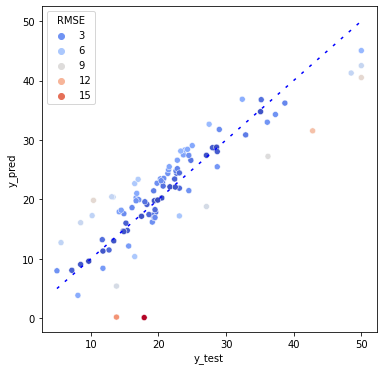

In [54]:
test_pred_df = pd.DataFrame({'y_test': y_test, 'y_pred': y_pred, 'RMSE':np.sqrt((y_test-y_pred)**2)})
plt.figure(figsize=(6,6))

# Scatter plot (Gráfico de dispersión) y_test vs. y_pred
sns.scatterplot(x='y_test', y='y_pred', hue='RMSE', palette='coolwarm', data = test_pred_df)

# y_test = y_pred line. Cuanto más cerca estén los puntos de esta línea, mejor será la predicción.
X_plot = np.linspace(test_pred_df['y_test'].min(), test_pred_df['y_test'].max(), 100)
Y_plot = X_plot
plt.plot(X_plot, Y_plot, color='b', dashes=[2, 5, 2, 5])
test_pred_df.head()

##Utilizo el método de regresión RANSAC

In [55]:
#Entreno el RANSAC
ransac = linear_model.RANSACRegressor()
ransac.fit(X_train, y_train)

#Predigo los valores
y_pred_ransac = ransac.predict(X_test)
y_pred_ransac


array([20.7442128 , 24.60395969, 10.79105292, 13.99355475, 32.71313324,
       31.79379603, 25.20739003, 19.22579494, 24.21669838, 17.44635437,
       17.02368432, 20.16730893, 13.14855781, 35.85657492, 17.10670961,
       24.80058026, 17.76625215, 26.07966074, 11.78751734, 23.01558642,
       22.51882406, 22.24616292, 10.55320501, 22.94200735, 18.83643917,
       15.88637166, 19.9919808 ,  9.47195988, 25.07714013, 21.09263594,
       16.29566993, 19.72249722, 25.77104635, 15.71927156, 28.48491416,
       20.5043202 , 34.05990661, 14.4615054 , 27.27550646, 15.89399615,
       28.67559606, 23.88322196, 16.06484732, 21.87859275, 18.21547726,
       33.04064714, 18.94144731, 26.20538888, 22.25509945, 16.90044091,
       21.11341076, 29.56266114, 26.38608111, 20.77850594, 11.27094353,
       26.13854771, 10.17723029, 17.55113926, 13.46392524, 17.47891561,
        2.64671604, 23.38078684, 27.51212108, 22.04702999, 28.97129263,
       27.59659083,  5.31084134, 20.00381891, 17.70889165, 17.72

##Utilizo metricas para ver que tan buena fue la predicción utilizando RANSAC
Uso Mean Absolute Error (MAE),También Mean Squared Error (MSE) y Root Mean Squared Error (RMSE)

In [56]:
print("MAE =", metrics.mean_absolute_error(y_test, y_pred_ransac))
print("MSE =",metrics.mean_squared_error(y_test, y_pred_ransac))
print("RMSE =",np.sqrt(metrics.mean_squared_error(y_test, y_pred_ransac)))

MAE = 3.884308984743688
MSE = 35.895052597200454
RMSE = 5.991247999974668


##Grafico el RMSE para cada punto para ver que tan buena fue la predicción utilizando RANSAC

,y_test,y_pred_ransac,RMSE
96,21.4,20.744213,0.655787
289,24.8,24.603960,0.196040
456,12.7,10.791053,1.908947
143,15.6,13.993555,1.606445
267,50.0,32.713133,17.286867


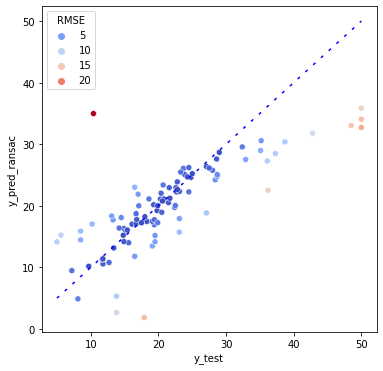

In [57]:
test_pred_ransac_df = pd.DataFrame({'y_test': y_test, 'y_pred_ransac': y_pred_ransac, 'RMSE':np.sqrt((y_test-y_pred_ransac)**2)})
plt.figure(figsize=(6,6))

# Scatter plot (Gráfico de dispersión) y_test vs. y_pred
sns.scatterplot(x='y_test', y='y_pred_ransac', hue='RMSE', palette='coolwarm', data = test_pred_ransac_df)

# y_test = y_pred line. Cuanto más cerca estén los puntos de esta línea, mejor será la predicción.
X_plot = np.linspace(test_pred_ransac_df['y_test'].min(), test_pred_ransac_df['y_test'].max(), 100)
Y_plot = X_plot
plt.plot(X_plot, Y_plot, color='b', dashes=[2, 5, 2, 5])
test_pred_ransac_df.head()

## Usando RANSAC para esté caso empeoró los resultados de la regresión lineal
Observando las métricas se nota que el MSE es mayor en el RANSAC, con respecto las otras tienen errores similares
##Ahora pruebo con otro modelo de regresion que es el Lasso

In [81]:
#Entreno el modelo
lasso = linear_model.Lasso(alpha=0.1)
lasso.fit(X_train, y_train)
#Predigo
y_pred_lasso = lasso.predict(X_test)
y_pred_lasso

array([24.34609729, 26.00820158, 11.51422247, 13.23236921, 39.88110203,
       32.7670666 , 27.5590566 , 23.02816727, 28.55828957, 19.48964788,
       18.48318512, 22.72937572, 13.34600279, 43.49713542, 19.65234143,
       26.03359635, 20.77398182, 27.34035933, 10.9956915 , 25.45288667,
       26.20941698, 24.54076929,  9.28069133, 26.13759492, 19.47860548,
        9.76784312, 20.3982014 ,  7.74125455, 28.54198994, 23.37795714,
       17.59615582, 22.7846198 , 28.44004249, 17.25617951, 32.53655022,
       24.16401016, 40.45317153, 15.57317802, 31.47663671, 16.54307054,
       31.83275601, 24.98022853, 15.88268331, 24.56188031, 20.2215076 ,
       39.17859893, 18.78251808, 27.31329645, 22.12937743, 20.04586203,
       23.63202557, 35.45381266, 27.56035297, 22.8793179 , 12.39859663,
       31.98072221,  9.18154477, 18.35541129, 15.40977527, 16.99614446,
       -0.56579878, 22.69790004, 31.20653104, 23.18265365, 33.41247178,
       28.85886844,  4.52042196, 20.41043269, 19.92849138, 17.08

##Los parámetros de ajuste lineal del Lasso

In [82]:
print(f'Intercept: {lasso.intercept_}\n')
print(f'Coeficientes: {lasso.coef_}')

Intercept: 22.40810443648772

Coeficientes: [-0.03525384  0.41923803 -0.06611546  0.88143345 -1.06704777  3.04331224
 -0.11016977 -1.95667659  0.45662526 -0.37574355 -1.67731401  1.05695115
 -3.96835856]


##Utilizo metricas para ver que tan buena fue la predicción Lasso
Uso Mean Absolute Error (MAE),También Mean Squared Error (MSE) y Root Mean Squared Error (RMSE)

In [83]:
print("MAE =", metrics.mean_absolute_error(y_test, y_pred_lasso))
print("MSE =",metrics.mean_squared_error(y_test, y_pred_lasso))
print("RMSE =",np.sqrt(metrics.mean_squared_error(y_test, y_pred_lasso)))

MAE = 3.513405325826705
MSE = 23.28211724020269
RMSE = 4.825154633812547


##Grafico el RMSE para cada punto para ver que tan buena fue la predicción utilizando Lasso

,y_test,y_pred_lasso,RMSE
96,21.4,24.346097,2.946097
289,24.8,26.008202,1.208202
456,12.7,11.514222,1.185778
143,15.6,13.232369,2.367631
267,50.0,39.881102,10.118898


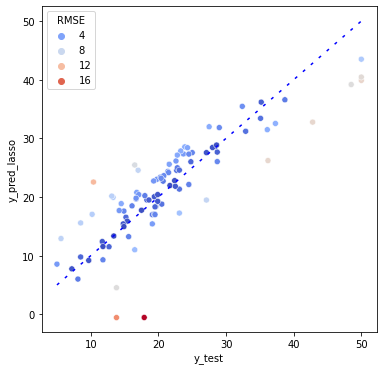

In [84]:
test_pred_lasso_df = pd.DataFrame({'y_test': y_test, 'y_pred_lasso': y_pred_lasso, 'RMSE':np.sqrt((y_test-y_pred_lasso)**2)})
plt.figure(figsize=(6,6))

# Scatter plot (Gráfico de dispersión) y_test vs. y_pred
sns.scatterplot(x='y_test', y='y_pred_lasso', hue='RMSE', palette='coolwarm', data = test_pred_lasso_df)

# y_test = y_pred line. Cuanto más cerca estén los puntos de esta línea, mejor será la predicción.
X_plot = np.linspace(test_pred_lasso_df['y_test'].min(), test_pred_lasso_df['y_test'].max(), 100)
Y_plot = X_plot
plt.plot(X_plot, Y_plot, color='b', dashes=[2, 5, 2, 5])
test_pred_lasso_df.head()

##Comparación
Se usaron tres metodos, los cuales tuvieron comportamientos similares. Sin embargo, el mejor resultado para este dataset lo dió la regresión lineal de diferencias de cuadrados. Se podrían cambiar los parámetros de los métodos de regresión para obtener mejores resultados dependiendo el tipo de dataset y como sea los datos que contiene.